In [35]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
data_file = os.path.join('D:', os.path.sep, 'prg', 'Datasets', 'general', 'Regression', 'kc_house_data.csv')

In [37]:
df = pd.read_csv(data_file)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
len(df)

21613

In [39]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Preprocessing
**Intentionally left off**

**Note:**
* 1- yr_renovated = 0 means no renovate done for home. (mean or year build can be repleaced with)
* 2- zip code has no numerical value, and must be handled as catrgorical column () or be deteled!

In [40]:
X = df.iloc[:, 3:].values
y = df['price'].values

## Regressor Model

In [41]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [43]:
xg_reg = xgb.XGBRFRegressor( colsample_bynode=0, learning_rate=0.1, max_depth= 6, n_estimators=1000, verbosity=3)

In [44]:
%%time
xg_reg.fit(X_train, y_train)

[08:01:17] ======== Monitor (0): HostSketchContainer ========
[08:01:17] AllReduce: 0.000735s, 1 calls @ 735us

[08:01:17] MakeCuts: 0.000934s, 1 calls @ 934us

[08:01:17] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[08:01:18] ======== Monitor (0): Learner ========
[08:01:18] Configure: 0.00028s, 1 calls @ 280us

[08:01:18] EvalOneIter: 1.2e-05s, 1 calls @ 12us

[08:01:18] GetGradient: 1.6e-05s, 1 calls @ 16us

[08:01:18] PredictRaw: 1.1e-05s, 1 calls @ 11us

[08:01:18] UpdateOneIter: 0.756126s, 1 calls @ 756126us

[08:01:18] ======== Monitor (0): GBTree ========
[08:01:18] BoostNewTrees: 0.755595s, 1 calls @ 755595us

[08:01:18] CommitModel: 2.3e-05s, 1 calls @ 23us

[08:01:18] ======== Monitor (0): HistUpdater ========
[08:01:18] BuildHistogram: 0.187921s, 5000 calls @ 187921us

[08:01:18] EvaluateSplits: 0.12027s, 6000 calls @ 120270us

[08:01:18] InitData: 0.029

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=0,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror', ...)

## Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
y_pred = xg_reg.predict(X_test)

[08:01:18] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0


## Mean Absolute Error (MAE)
#### The result of the model differs from the actual value by an average of X (MEA Value) units
#### MEA is the same scale as target variable (as kind as data) and interpretable based on mean and std

In [47]:
mae = mean_absolute_error(y_test, y_pred)
mae

221649.63650900743

#### interpretation:
**On average, the prediction deviate by  221649 unit (in this case USD) from actual [target] price**

In [48]:
print('Price mean: ', df['price'].mean())
print('Price std:  ', df['price'].std())

Price mean:  540088.1417665294
Price std:   367127.1964826997


## R2 Score (Coefficient of Determination)
$$R^{2} = 1 - \frac{RSS}{TSS}$$
<br/>
$${RSS (\text{aka) } SS_{res} : Residual (error) Squar Sum}$$
$$RSS = \sum_{i} e_{i}^{2} \text{  =  } \sum_{i}(y_{i} -f_{i})^2$$
<br/>
$${TSS (\text{aka) } SS_{tot} : Total (error) Squar Sum}$$
$$TSS = \sum_{i}(y_{i} - \overline{y}_{i})^2$$

**NOTE: More score value means better result**

In [49]:
r2_score(y_test, y_pred)

0.0945244320803954

In [50]:
mse = mean_squared_error(y_test, y_pred)
mse

124183924549.51414

In [51]:
rmse = np.sqrt(mse)
rmse

352397.39577572665

## Feature Importance

**Means which columns has more effect on target (in this sample target is price)**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

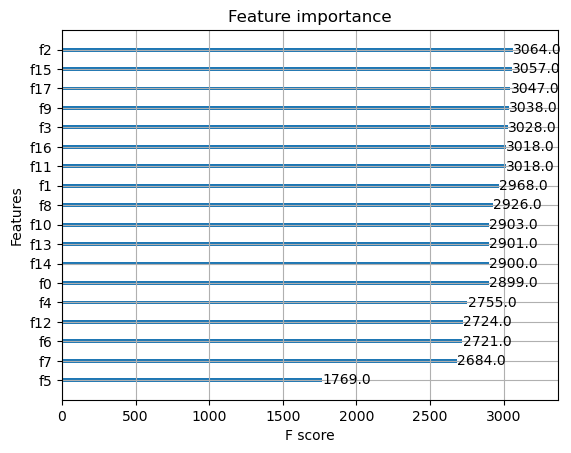

In [52]:
xgb.plot_importance(xg_reg)

#### Now lets discuss about feature importance:
**'lat' is one of most effective columns on the target**

In [34]:
df.columns[17]

'lat'

In [59]:
df.corr(numeric_only=True)['lat']['price']

0.3070034799952544

**But as you see above, the correlation between 'lat' and 'price' is 0.3 and its not impresive, so why it has determined as an important feature?**
<br/><br/>

**The answer is: Correlation shows the linear relations but reggressors can detect non-linear relations also.**